In [2]:
import pandas as pd
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np

In [4]:
df = pd.read_csv('Dataset/dataset_labeling_twitter2.csv') #Read dataset
df.to_numpy()
df

,Unnamed: 0,id,date,user,tweet,stem,label,tokenizing
0,0,1535059785665478656,2022-06-10 00:42:27,DiagaPaiker,"@Muhdzahir @hrdbacot Biar mudah di pahami, mir...",biar mudah paham tenaga sehat pns dokter pppk ...,1,"['biar', 'mudah', 'di', 'pahami', 'mirip', 'se..."
1,1,1535048183424106498,2022-06-09 23:56:21,chalistamall,#Jubahoperasi Jubah operasi\n#Apdgown Apd Gow...,jubah operasi apd gown surgical gown jubah ope...,-1,"['jubah', 'operasi', 'apd', 'gown', 'surgical'..."
2,2,1535034965510934529,2022-06-09 23:03:50,romiaann,Tapi kok dokter2/tenaga medis gak jelasin ya? ...,dokter tenaga medis jelasin ya orang kritis hm...,-1,"['tapi', 'kok', 'dokter', 'tenaga', 'medis', '..."
3,3,1535031570629021696,2022-06-09 22:50:20,sundarkeu_,"Gimana ya, para dokter atau tenaga medis lain ...",gimana ya dokter tenaga medis tuh ngasih tau p...,-1,"['gimana', 'ya', 'para', 'dokter', 'atau', 'te..."
4,4,1535026983469740032,2022-06-09 22:32:06,aburnin6hill,@mediocrickey semua itu ga bakal terjadi kalo ...,ga kalo indonesia bijak safe abortions kaya uk...,1,"['semua', 'itu', 'ga', 'bakal', 'terjadi', 'ka..."
...,...,...,...,...,...,...,...,...
612,612,1541757928944074753,2022-06-28 12:18:29,Koovelly,@lix_lee007 kohhh butuh staff apa ga gitu?? ka...,kohhh butuh staff ga gitu kalo tenaga medis gi...,0,"['kohhh', 'butuh', 'staff', 'apa', 'ga', 'gitu..."
613,613,1541739415684251648,2022-06-28 11:04:55,berminyaq,"banyak org pergi ke penang u/berobat, pertanya...",org pergi nang u obat tanya kualitas obat indo...,1,"['banyak', 'org', 'pergi', 'ke', 'penang', 'u'..."
614,614,1541738920790360066,2022-06-28 11:02:57,Istrigongyoo_,@andinapungkii @IbrahimCholid @xyzdnaa @UpWani...,hbs operasi ruang recovery ga ditemenin keluar...,0,"['aku', 'dulu', 'hbs', 'operasi', 'di', 'ruang..."
615,615,1541729275098763264,2022-06-28 10:24:37,itsdinaamalia,Sendernya medstud bukan ni? Klo iya parah siii...,sender medstud ni iya parah siii calon tenaga ...,0,"['sendernya', 'medstud', 'bukan', 'ni', 'klo',..."


In [5]:
# Setup X & y 
X = list()
y = list()

for i, r in df.iterrows():
    X.append(str(r['stem']))
    y.append(r['label'])
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [6]:
# Visualisasi Train Data
train_data = {'stem':list(), 'label':list()}
for xt in range(len(X_train)):
    train_data['stem'].append(X_train[xt])
    train_data['label'].append(y_train[xt])
train_data = pd.DataFrame(train_data)
train_data

,stem,label
0,teroris sedia tenaga medis guru anak anak papu...,0
1,puan perintah siaga dokter anak tenaga medis d...,0
2,tenaga medis taruh sumpah uang dosa ampun,-1
3,puluh tenaga medis terjun layan delegasi w man...,0
4,adek awat magang bikin heboh kena jagat tenaga...,0
...,...,...
457,innalillahi wainnailaihi rojiuun segenap jajar...,-1
458,konten cringe no empathy tenaga medis gk indon...,0
459,pas dokter cowok aja teriak leceh gilir si,0
460,giat ikut pegawai orang warga bina pemasyrakat...,-1


In [7]:
## Menghitung setiap jumlah Negative, Neutral dan Positive yang ada di data train
train_label_positive = 0
train_label_negative = 0
train_label_neutral = 0 #

train_datasets = list()

for index, row in train_data.iterrows():
    if(row['stem'] != ''):
        if(row['label'] == -1):
            train_label_negative += 1
        elif(row['label'] == 0):
            train_label_neutral += 1 #
        else:
            train_label_positive  += 1

        ## Append array train_data
        to_append = {
            'stemming_tweet' : row['stem'],
            'label' : row['label']
        }
        train_datasets.append(to_append)
print('============================ TRAIN DATA ===============================')     
print('Total Label Positive = ', train_label_positive)
print('Total Label Neutral = ', train_label_neutral) #
print('Total Label Negative = ', train_label_negative)
print('=======================================================================')

============================ TRAIN DATA ===============================
Total Label Positive =  141
Total Label Neutral =  187
Total Label Negative =  134


In [8]:
# Visualisasi Test Data
test_data = {'stem':list(), 'label':list()}
for xt in range(len(X_test)):
    test_data['stem'].append(X_test[xt])
    test_data['label'].append(y_test[xt])
test_data = pd.DataFrame(test_data)
test_data

,stem,label
0,hbs operasi ruang recovery ga ditemenin keluar...,0
1,bnyk tenaga medis meng iya sueeee,0
2,ngomong sikap global covid dg dlm konteks mana...,-1
3,lu bayangin aja tenaga medis model gituuu nger...,1
4,indonesia salah akun tenaga sehat kalo ngasih ...,1
...,...,...
150,polda kodam tengah oap butuh tenaga medis tena...,0
151,kalo turut ya wlwpun cm cerita org dekat buat ...,1
152,rsud dr soehadi prijonegoro sragen limpah tena...,0
153,jubah operasi apd gown surgical gown jubah ope...,-1


In [9]:
## Menghitung setiap jumlah Negative, Neutral dan Positive yang ada di data test
test_label_positive = 0
test_label_negative = 0
test_label_neutral = 0

test_datasets = list()

for index, row in test_data.iterrows():
    if(row['stem'] != ''):
        if(row['label'] == -1):
            test_label_negative += 1
        elif(row['label'] == 0):
            test_label_neutral += 1 #
        else:
            test_label_positive  += 1

        ## Append array train_data
        to_append = {
            'stemming_tweet' : row['stem'],
            'label' : row['label']
        }
        test_datasets.append(to_append)
print('============================ Test DATA ===============================')     
print('Total Label Positive = ', test_label_positive)
print('Total Label Negative = ', test_label_negative)
print('Total Label Neutral = ', test_label_neutral) #
print('=======================================================================')

============================ Test DATA ===============================
Total Label Positive =  40
Total Label Negative =  42
Total Label Neutral =  73


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer     = TfidfVectorizer(norm='l2') # Membuat TF ID-F Vectorizer
X_train_corpus = vectorizer.fit_transform(X_train) # Mencari vocabulary
feature_names  = vectorizer.get_feature_names_out() # Mendapatkan Feature Names matrix
feature_names

array(['abai', 'abdi', 'abi', ..., 'zealand', 'zee', 'zico'], dtype=object)

In [11]:
X_test_corpus = vectorizer.transform(X_test) # Masukan corpus test ke matrix train

df_vec_test = pd.DataFrame(X_test_corpus.toarray(), columns=feature_names)

## Algoritma Naive Bayes

In [12]:
model = GaussianNB()
model.fit(X_train_corpus.toarray(), y_train)
y_pred= model.predict((X_test_corpus.toarray()))
preds = y_pred.tolist()

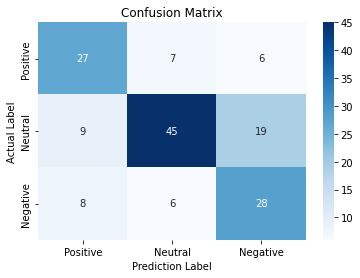

In [13]:
 # confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
    
Confusion_matrix = confusion_matrix(y_test, y_pred, labels=[1,0,-1])
class_label      = ['Positive', 'Neutral','Negative']
df_confusion     = pd.DataFrame(Confusion_matrix, index = class_label, columns = class_label)
sns.heatmap(df_confusion, annot=True, fmt = "d", cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Prediction Label')
plt.ylabel('Actual Label')
plt.show()

In [14]:
_accuracy   = accuracy_score(y_test, y_pred)
_precission = precision_score(y_test, y_pred, average='micro')
_recall     = recall_score(y_test, y_pred, average='micro')
_fscore     = f1_score(y_test, y_pred, average='micro')

print('Accuracy Score =', "{:.2f}".format(_accuracy))
print('Precission =', "{:.2f}".format(_precission))
print('Recall =', "{:.2f}".format(_recall))
print('F-Score =', "{:.2f}".format(_fscore))

Accuracy Score = 0.65
Precission = 0.65
Recall = 0.65
F-Score = 0.65


In [15]:
# Menghitung nilai akurasi dari klasifikasi naive bayes 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.53      0.67      0.59        42
           0       0.78      0.62      0.69        73
           1       0.61      0.68      0.64        40

    accuracy                           0.65       155
   macro avg       0.64      0.65      0.64       155
weighted avg       0.67      0.65      0.65       155



In [16]:
#persentase label hasil prediksi menggunakan algoritma Naive Bayes
df_result_nb = pd.DataFrame({'prediksi':y_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_nb = pd.DataFrame(df_result_nb['prediksi'].value_counts()/df_result_nb['prediksi'].count()*100)
df_persen_nb = df_persen_nb.rename(index={-1:'Negative', 0:'Neutral', 1:'Positive'})
df_persen_nb

,prediksi
Neutral,37.42%
Negative,34.19%
Positive,28.39%


In [17]:
print('Label', df_persen_nb.index[0] ,'memiliki persentase sebesar', '{:,.2f}'.format(df_persen_nb['prediksi'][0]), '%')
print('Label', df_persen_nb.index[1] ,'memiliki persentase sebesar', '{:,.2f}'.format(df_persen_nb['prediksi'][1]), '%')
print('Label', df_persen_nb.index[2] ,'memiliki persentase sebesar', '{:,.2f}'.format(df_persen_nb['prediksi'][2]), '%')

Label Neutral memiliki persentase sebesar 37.42 %
Label Negative memiliki persentase sebesar 34.19 %
Label Positive memiliki persentase sebesar 28.39 %


In [18]:
print('Prediksi menggunakan algoritma Naive Bayes menghasilkan label', df_persen_nb['prediksi'].idxmax() ,'memiliki persentase terbanyak sebesar', '{:,.2f}'.format(max(df_persen_nb['prediksi']), 2), '%')

Prediksi menggunakan algoritma Naive Bayes menghasilkan label Neutral memiliki persentase terbanyak sebesar 37.42 %


## Algoritma SVM

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

#Menggunakan GridSearch dengan fold 6 (melalui cv = 6)
param_grid = {'C': [1e2, 1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, cv = 6)
clf.fit(X_train_corpus.toarray(), y_train)
pred = clf.predict(X_test_corpus.toarray())
model.fit(X_train_corpus.toarray(), y_train)
y_pred= model.predict((X_test_corpus.toarray()))

In [20]:
print(clf.best_estimator_)

SVC(C=5000.0, class_weight='balanced', gamma=0.0005)


In [21]:
_accuracy   = accuracy_score(y_test, pred)
_precission = precision_score(y_test, pred, average='micro')
_recall     = recall_score(y_test, pred, average='micro')
_fscore     = f1_score(y_test, pred, average='micro')

print('Accuracy Score =', "{:.2f}".format(_accuracy))
print('Precission =', "{:.2f}".format(_precission))
print('Recall =', "{:.2f}".format(_recall))
print('F-Score =', "{:.2f}".format(_fscore))

Accuracy Score = 0.70
Precission = 0.70
Recall = 0.70
F-Score = 0.70


In [22]:
# Menghitung nilai akurasi dari klasifikasi SVM 
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          -1       0.59      0.71      0.65        42
           0       0.73      0.67      0.70        73
           1       0.78      0.72      0.75        40

    accuracy                           0.70       155
   macro avg       0.70      0.70      0.70       155
weighted avg       0.71      0.70      0.70       155



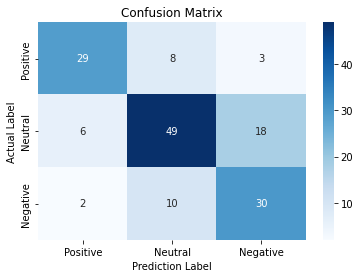

In [23]:
# confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
    
Confusion_matrix = confusion_matrix(y_test, pred, labels=[1,0,-1])
class_label      = ['Positive', 'Neutral','Negative']
df_confusion     = pd.DataFrame(Confusion_matrix, index = class_label, columns = class_label)
sns.heatmap(df_confusion, annot=True, fmt = "d", cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Prediction Label')
plt.ylabel('Actual Label')
plt.show()

In [24]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_svm = pd.DataFrame({'prediksi':pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_svm = pd.DataFrame(df_result_svm['prediksi'].value_counts()/df_result_svm['prediksi'].count()*100)
df_persen_svm = df_persen_svm.rename(index={-1:'Negative', 0:'Neutral', 1:'Positive'})
df_persen_svm

,prediksi
Neutral,43.23%
Negative,32.90%
Positive,23.87%


In [25]:
print('Label', df_persen_svm.index[0] ,'memiliki persentase sebesar', '{:,.2f}'.format(df_persen_svm['prediksi'][0]), '%')
print('Label', df_persen_svm.index[1] ,'memiliki persentase sebesar', '{:,.2f}'.format(df_persen_svm['prediksi'][1]), '%')
print('Label', df_persen_svm.index[2] ,'memiliki persentase sebesar', '{:,.2f}'.format(df_persen_svm['prediksi'][2]), '%')

Label Neutral memiliki persentase sebesar 43.23 %
Label Negative memiliki persentase sebesar 32.90 %
Label Positive memiliki persentase sebesar 23.87 %


In [26]:
print('Prediksi menggunakan algoritma SVM menghasilkan label', df_persen_svm['prediksi'].idxmax() ,'memiliki persentase terbanyak sebesar', '{:,.2f}'.format(max(df_persen_svm['prediksi']), 2), '%')

Prediksi menggunakan algoritma SVM menghasilkan label Neutral memiliki persentase terbanyak sebesar 43.23 %


## Persentase label

In [27]:
#persentase label dataset
pd.options.display.float_format = '{:,.2f}%'.format
df_persen = pd.DataFrame(round((df['label'].value_counts()/df['label'].count())*100, 2))
df_persen = df_persen.rename(index={-1:'Negative', 0:'Neutral', 1:'Positive'})
df_persen = df_persen.rename(columns={'label':'Persentase'})
df_persen

,Persentase
Neutral,42.14%
Positive,29.34%
Negative,28.53%


In [28]:
print('Label', df_persen.index[0] ,'memiliki persentase sebesar','{:,.2f}'.format( df_persen['Persentase'][0]), '%')
print('Label', df_persen.index[1] ,'memiliki persentase sebesar', '{:,.2f}'.format(df_persen['Persentase'][1]), '%')
print('Label', df_persen.index[2] ,'memiliki persentase sebesar', '{:,.2f}'.format(df_persen['Persentase'][2]), '%')

Label Neutral memiliki persentase sebesar 42.14 %
Label Positive memiliki persentase sebesar 29.34 %
Label Negative memiliki persentase sebesar 28.53 %


In [29]:
print('Label', df_persen['Persentase'].idxmax() ,'memiliki persentase terbanyak sebesar', '{:,.2f}'.format(max(df_persen['Persentase']), 2), '%')

Label Neutral memiliki persentase terbanyak sebesar 42.14 %
